<a href="https://colab.research.google.com/github/citrus1998/nlp100/blob/main/nlp100_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://nlp100.github.io/data/neko.txt

--2022-06-24 00:18:02--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.110.153, 185.199.108.153, 185.199.111.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.1’

neko.txt.1          100%[===================>] 952.92K  --.-KB/s    in 0.05s   

2022-06-24 00:18:02 (19.7 MB/s) - ‘neko.txt.1’ saved [975789/975789]



In [4]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 49 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ub

In [5]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [6]:
# Check the number of sentences
!wc -l ./neko.txt.mecab

226266 ./neko.txt.mecab


In [7]:
!pip install mecab-python3 unidic-lite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 574 kB 5.0 MB/s 
     |████████████████████████████████| 47.4 MB 1.3 MB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=44daaa34b77088a4ed3b9814a3f7c461fdeb0ac28b3dab9d11d5b25dcd75643c
  Stored in directory: /root/.cache/pip/wheels/de/69/b1/112140b599f2b13f609d485a99e357ba68df194d2079c5b1a2
Successfully built unidic-lite


# 30. 形態素解析結果の読み込み  
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [8]:
import MeCab

In [9]:
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, 'r', encoding='utf-8') as f:
  for l in f:
    if l not in 'EOS\n':
      spl_l = l.split('\t')
      if spl_l[0] != '':
        spl_cxt = spl_l[1].split(',')
        spl_cxt[-1] = spl_cxt[-1].replace('\n', '')
        morph = {'surface': spl_l[0], 'base': spl_cxt[6], 'pos': spl_cxt[0], 'pos1': spl_cxt[1]}
        morphs.append(morph)
    else:
      sentences.append(morphs)
      morphs = []

sentences = sentences[:2] + [m for m in sentences[2:] if len(m) != 0]
for i, m in enumerate(sentences[2]):
  print(m)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


#31.
動詞の表層形をすべて抽出せよ．

#32.
動詞の基本形をすべて抽出せよ．

#33.
2つの名詞が「の」で連結されている名詞句を抽出せよ．

#34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [10]:
def list2str(lst):
  return ''.join(lst)

In [11]:
def continue_word_counter(word, idx):
  continue_words = [word[idx]['surface']]
  while word[idx+1]['pos'] != '名詞':
    if word[idx+1]['pos'] != '名詞':
      break
    continue_words.append(word[idx+1]['surface'])
    idx += 1
  #return list2str(continue_words)
  return continue_words

In [12]:
result31 = []
result32 = []
result33 = []
result34 = []

for s in sentences:
  for i, m in enumerate(s):
    if m['pos'] == '動詞':
      result31.append(m['surface'])
      result32.append(m['base'])

  for i in range(1, len(s) - 1):
    if s[i]['surface'] == 'の' and (s[i-1]['pos'] == '名詞' and s[i+1]['pos'] == '名詞'):
      #print(s[i-1]['surface'], s[i+1]['surface'])
      result33.append((s[i-1]['surface'], s[i+1]['surface']))
    
    if s[i]['pos'] == '名詞' and s[i+1]['pos'] == '名詞':
      #print(s[i]['surface'], s[i+1]['surface'])
      #result34.append((s[i]['surface'], s[i+1]['surface']))
      print(continue_word_counter(s, i))


result31 = set(result31)
result32 = set(result32)
result33 = set(result33)
result34 = set(result34)

ストリーミング出力は最後の 5000 行に切り捨てられました。
['一']
['分']
['マイナス']
['一']
['分']
['マイナス']
['三']
['分']
['四']
['二']
['二']
['二']
['廻']
['二']
['十']
['毛']
['一']
['手']
['人間']
['酔']
['暑中']
['休暇']
['張']
['胃弱']
['風呂']
['ざあざあ']
['一']
['今日']
['先生']
['苦']
['沙弥']
['隣']
['ワン']
['驚']
['扇']
['風呂']
['三']
['私']
['なん']
['沙弥']
['迷亭']
['君']
['ん']
['ざ']
['ホホホ']
['土用']
['あと']
['変']
['ちきり']
['希']
['牛肉']
['一']
['希']
['お話']
['希']
['希']
['希']
['——」「']
['あら']
['鍛冶']
['鍛冶']
['迷亭']
['支那']
['苦']
['沙弥']
['一']
['迷亭']
['——']
['誂']
['一つ']
['驚']
['欠伸']
['坐り']
['まま']
['寄木']
['巻煙草']
['一']
['君']
['横']
['ッ']
['突']
['帰']
['天']
['斎']
['君']
['事']
['心配']
['壊']
['まま']
['沙弥']
['価']
['迷亭']
['ケース']
['十']
['四']
['パナマ']
['好奇']
['厄']
['十']
['四']
['迷亭']
['三']
['日']
['ぷつりと']
['度']
['物']
['螺旋']
['釘']
['ん']
['ざあ']
['損']
['眼']
['覚']
['眼']
['眼']
['時']
['客']
['二']
['奥さん']
['なあに']
['辛']
['心配']
['むざと']
['二']
['奥さん']
['一']
['十']
['二']
['三']
['簀']
['さ']
['三']
['分']
['八']
['一']
['五']
['ゅうと']
['咽']
['一']
['二']
['度']
['迷亭']
['一']
['二']
['滴']
['眼']
['二']
['三']
['奥さん

In [13]:
print(result31)

{'吊ら', '充たす', 'しい', '較べる', '乗り出す', '撚っ', '失せ', '掘り出す', '映じ', '守ら', '吐き', '思っ', '告げん', '分かれ', '拾える', '抛り出さ', '躍り出', 'すれ', 'つづか', 'ならべる', '話しかける', '戒め', 'られりゃ', 'あせる', '延び', '吹き', '引い', '発し', '極まっ', '眠れ', '取り留め', '受け合う', 'ゆす', '笑える', 'あい', '感じる', '取り扱っ', '振ら', 'すっ', '出逢え', 'あげ', 'いり', '拾っ', 'すくい', '遠ざかる', '競っ', '念じ', '相成り', '睨み合っ', '尋ねる', '責め', '洩らさ', '飛び込ん', '容れ', '溯っ', 'しら', '食っ', 'ゆるめ', '壊し', '貼り', '吸っ', '陥ら', '臨ん', '廃せ', '振り立て', '収めん', '取', '捨てる', '乗り越す', '乗り出し', '儲ける', '刺し', 'てる', '落つ', 'かま', '焦る', '洗い', '取り扱い', '納め', '洩らす', '引き上げ', '織', '呑み込む', '涸らす', 'すぎる', '縊れる', '揚げる', '見識張っ', '負ける', '吸い', '響け', '呑む', '擲つ', '通そ', '作ろ', 'ぬかり', '合わし', '引き抜く', '略す', '荒立て', '尽き', 'くるん', '栄え', '吹き出す', 'こうっ', '並べ立て', '傾く', '追いやっ', '漬け', '踊ら', 'なくなる', '告げ', 'くるまっ', '服せ', '滅する', '窺う', 'やってくる', 'だまる', 'きせ', '臨ま', '云う', 'やれん', '恐る', '出し', 'おけ', '任せ', '捕り', '驚かし', '立ち至り', 'くだけ', '隣り', '追いつく', 'つまみ出す', 'くずさ', '寄り付く', '迷い込ん', '仕り', '買い', '燻り', 'こい', 'かたどっ', '引き続い', 'い', 'いろ', '突く', '浮かば', '満ち', '受け取ら', '弾ずる'

In [14]:
print(result32)

{'しごく', '充たす', 'つかう', '乗り出す', '較べる', 'しらべる', '掘り出す', '汚れる', '拾える', 'ならべる', '話しかける', '飼う', '発す', 'あせる', '呼び立てる', '持たす', '吹き払う', '受け合う', 'よぶ', '笑える', '感じる', '切り刻む', '溜る', '世帯染みる', '遠ざかる', '通り越す', '挟まる', '打ち抜く', '尋ねる', 'もとめる', 'たなびく', 'しゃくう', '振り落とす', '助ける', 'しなびる', '炊く', '乱れる', 'せまる', 'まごつく', '捨てる', '乗り越す', '儲ける', 'てる', '落つ', '焦る', '亡くなる', 'もがく', '洩らす', '呑み込む', '涸らす', 'すぎる', '洗える', '触れる', '縊れる', '揚げる', '負ける', '取り出す', '呑む', '引き抜く', '擲つ', '略す', '吹き出す', '傾く', '降り込む', 'なくなる', '転がす', '滅する', 'らっしゃる', '延べる', '窺う', 'うてる', '吸い込む', 'だまる', '伸す', '恐る', 'やってくる', '云う', '据わる', '錬る', '引きつける', '追いつく', 'かき合せる', 'つまみ出す', '寄り付く', 'ひそめる', '突く', 'めでる', 'そり返る', '引き込む', '追いやる', '弾ずる', '鑑みる', 'ひっくり返す', '済す', '浮かぶ', '飛び上がる', '消える', '見下ろす', '潜る', '抜き取る', 'もつ', '含める', '擦り切れる', '走る', '冷やかす', '捕える', '萌す', 'たらす', '絶つ', '打ち殺す', 'はやる', 'せしめる', 'やめる', '生じる', '振り翳す', 'からむ', 'したがう', '食べる', 'しつくす', '見透かす', '寝過ごす', '属す', '進める', '取りかかる', '踏切る', '戻る', '焼く', '断つ', '開く', '突き付ける', 'すぼめる', '整える', '呼びつける', '譲る', '押し出す', '徹る', '差し出す

In [15]:
print(result33)

{('裏', '方'), ('法', 'うち'), ('革命', '当時'), ('無言', 'まま'), ('自炊', '鍋'), ('微塵', '責任'), ('仲居', '性格'), ('ナポレオン', 'よう'), ('主人', '前'), ('主人', '愚'), ('本', '枝'), ('様', 'もの'), ('唐桟', '半纏'), ('三平', 'よう'), ('上', '利害'), ('聖母', '像'), ('君', 'ヴァイオリン'), ('鵜', '沼'), ('残念', '次第'), ('棚', '縁'), ('耶蘇教', '神'), ('文明', '咒詛'), ('個', '活動'), ('さっき', '女'), ('鳶口', 'よう'), ('旋毛曲り', '奇特'), ('教育', '結果'), ('屋根', '瓦'), ('真先', '烏'), ('君', '名'), ('馬鹿', '癖'), ('顎', '離合'), ('人', '事'), ('竹', 'よう'), ('芸者', '妻君'), ('さん', '泣顔'), ('不可測', '心'), ('人', '間'), ('越後獅子', '鼻'), ('自己', '体面'), ('臘', '哲学'), ('灯', '下'), ('もの', '重み'), ('鼠色', '毛布'), ('種', '装飾'), ('餅', '切れ'), ('玄関', '方'), ('主人', '役目'), ('鍋', '中'), ('返事', '勢'), ('甘干し', '柿'), ('抜', '骨頂'), ('古来', '賢哲'), ('彼', '髪'), ('人', '目'), ('障子', '内'), ('眼前', '習慣'), ('彼', '鼻'), ('分量', '砂糖'), ('冗談', 'よう'), ('あなた', 'ため'), ('つき', '狂人'), ('今', '人'), ('獣類', '人間'), ('作中', '人物'), ('味方', '恥辱'), ('耳', '立ち'), ('君', '世の中'), ('黒', '性質'), ('胃', '事'), ('口', 'なか'), ('ベーコン', '格言'), ('殊勝', '志'), ('膝', '傍'), ('襖',

In [16]:
print(result34)
print(len(result34))

set()
0


# 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [17]:
from collections import defaultdict

dic = defaultdict(int)
for s in sentences:
  for i, m in enumerate(s):
    if m['pos'] != '記号':
      dic[m['base']] += 1

dic = sorted(dic.items(), key=lambda k: k[1], reverse=True)

for k, v in dic:
  print(k, ':', v)

ストリーミング出力は最後の 5000 行に切り捨てられました。
若し : 2
江 : 2
喫する : 2
父母 : 2
畏い : 2
栄達 : 2
平家 : 2
再拝 : 2
不透明 : 2
寸断 : 2
打ち返す : 2
あくまで : 2
命題 : 2
小町 : 2
日間 : 2
役目 : 2
憚り : 2
御難 : 2
口上 : 2
痛み入る : 2
伴 : 2
将軍家 : 2
総会 : 2
すこしも : 2
引きつける : 2
戴く : 2
正成 : 2
理科 : 2
大騒ぎ : 2
読み : 2
よみ : 2
蝦 : 2
打ち殺す : 2
胆力 : 2
東洋 : 2
寄宿舎 : 2
泊りがけ : 2
膏薬 : 2
禅宗 : 2
逆さま : 2
陶然 : 2
禅学 : 2
踏切る : 2
溺れる : 2
助ける : 2
天上 : 2
仙人 : 2
僕ら : 2
権化 : 2
任じる : 2
世人 : 2
救う : 2
取り寄せる : 2
奇妙 : 2
上がれる : 2
きびしい : 2
そり : 2
来訪 : 2
通例 : 2
役人 : 2
物件 : 2
日本堤 : 2
恭謙 : 2
お辞儀 : 2
相場 : 2
波瀾 : 2
見習う : 2
唱道 : 2
病院 : 2
卜 : 2
持参 : 2
陽性 : 2
非凡 : 2
心丈夫 : 2
やさしい : 2
あす : 2
暴露 : 2
無意義 : 2
ごみ : 2
ほこり : 2
故事 : 2
挙る : 2
いっこう : 2
泣き声 : 2
具える : 2
出し : 2
ぬすむ : 2
シンフォニー : 2
美妙 : 2
炭 : 2
繁昌 : 2
正式 : 2
引きずり出す : 2
長女 : 2
教わる : 2
次女 : 2
白粉 : 2
はげしい : 2
授ける : 2
突進 : 2
拭う : 2
持ち : 2
あてがう : 2
たたく : 2
だだっ子 : 2
伊藤 : 2
博文 : 2
よむ : 2
させる : 2
良民 : 2
宙返り : 2
あくび : 2
洗い : 2
欅 : 2
笠 : 2
処理 : 2
刀 : 2
朱 : 2
おえる : 2
食事 : 2
暴威 : 2
暴君 : 2
したがって : 2
無難 : 2
取払う : 2
丹念 : 2
かじる : 2
まして : 2
絶 : 2
式部 

#36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [18]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.3 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=e445b070e646fc3fda1870fa5adbb2f800f16ba7908644ecd9dda95be9ef24c7
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


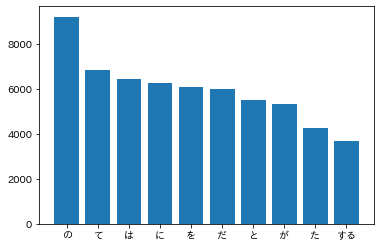

In [19]:
import matplotlib.pyplot as plt
import japanize_matplotlib

x, y = zip(*dic[:10])
plt.bar(x, y)
plt.show()

#37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

の : 391
は : 272
に : 250
を : 232
だ : 231
て : 229
と : 202
が : 180
する : 144
た : 140


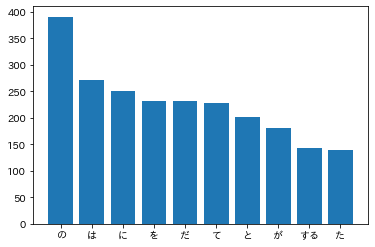

In [20]:
from collections import defaultdict

dic = defaultdict(int)
for s in sentences:
  if len([m for m in s if m['surface'] == '猫']) != 0:
   for i, m in enumerate(s):
     if m['pos'] != '記号':
       dic[m['base']] += 1

del dic['猫']
dic = sorted(dic.items(), key=lambda k: k[1], reverse=True)

for k, v in dic[:10]:
  print(k, ':', v)

x, y = zip(*dic[:10])
plt.bar(x, y)
plt.show()

#38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

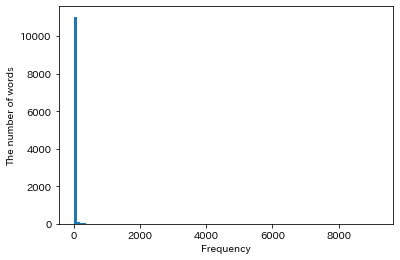

In [22]:
plt.hist(dic.values(), bins=100)
plt.xlabel('Frequency')
plt.ylabel('The number of words')
plt.show()